# Menggunakan Fungsi

In [1]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# standarisasi
from sklearn.preprocessing import StandardScaler

In [2]:
# preprocessing data
def preprocess_data(data):
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    norm_data = data/ np.linalg.norm(data, axis=1, keepdims=True) # normalisasi L2
    return norm_data

In [3]:
# step 2: Quantum Circuti for Distance Calculation
def create_distance_circuit(data_vector, centroid_vector):
    qc = QuantumCircuit(3,1) # 1 ancilla, 1 data, 1 centroid qubit
    
    # superposisi pada qubit ancilla
    qc.h(0)
    
    # encode data_vector ke qubit 1
    theta_data = 2 * np.arcsin(data_vector[0])
    qc.ry(theta_data, 1)
    
    # encode centroid_vector ke qubit 2 (controlled by ancilla)
    theta_centroid = 2 * np.arcsin(centroid_vector[0])
    qc.cry(theta_centroid, 0,2)
    
    # interferensi dengan Hadamard di ancilla
    qc.h(0)
    
    qc.measure(0,0)
    
    return qc
    

In [4]:
from qiskit_aer import AerSimulator
from qiskit import transpile
import numpy as np

# Step 3: Menghitung jarak Euclidean berbasis Quantum

def quantum_distance(data_vector, centroid_vector, shots=1024):
    qc = create_distance_circuit(data_vector, centroid_vector)  # Asumsikan fungsi ini sudah didefinisikan
    
    # Menggunakan AerSimulator
    aer_sim = AerSimulator()
    transpiled_circuit = transpile(qc, aer_sim)
    job = aer_sim.run(transpiled_circuit, shots=shots)

    # Mendapatkan hasil simulasi
    result = job.result()
    counts = result.get_counts()

    # Probabilitas mendapatkan hasil '0'
    p0 = counts.get('0', 0) / shots

    # Menghitung jarak Quantum
    distance = np.sqrt(4 * (1 - p0))
    return distance

# Step 4: q1:1-k-Means Clustering

def q1_1_kmeans(data, centroids, shots=1024):
    labels = []
    for point in data:
        distances = [quantum_distance(point, c, shots) for c in centroids]
        label = np.argmin(distances)
        labels.append(label)
    return labels

In [5]:
# Contoh Data (2D untuk kemudahan visualisasi)
data = np.array([[1, 2], [2, 3], [3, 4], [8, 8], [9, 9], [10, 10]])
centroids = np.array([[1, 2], [9, 9]])

# Preprocessing
processed_data = preprocess_data(data)
processed_centroids = preprocess_data(centroids)

# Clustering
labels = q1_1_kmeans(processed_data, processed_centroids)

# Output
for i, label in enumerate(labels):
    print(f"Data point {data[i]} diklasifikasikan ke cluster {label}")


Data point [1 2] diklasifikasikan ke cluster 1
Data point [2 3] diklasifikasikan ke cluster 1
Data point [3 4] diklasifikasikan ke cluster 1
Data point [8 8] diklasifikasikan ke cluster 1
Data point [9 9] diklasifikasikan ke cluster 1
Data point [10 10] diklasifikasikan ke cluster 0


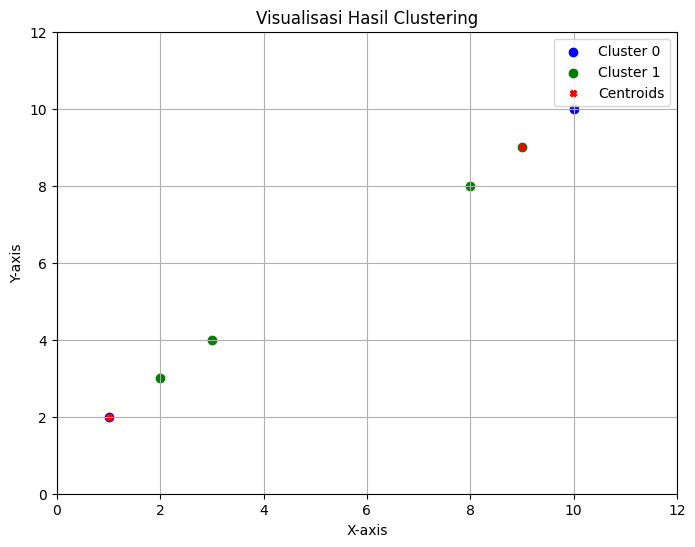

Data point [1 2] diklasifikasikan ke cluster 0
Data point [2 3] diklasifikasikan ke cluster 1
Data point [3 4] diklasifikasikan ke cluster 1
Data point [8 8] diklasifikasikan ke cluster 1
Data point [9 9] diklasifikasikan ke cluster 1
Data point [10 10] diklasifikasikan ke cluster 0


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Data dan centroid
data = np.array([[1, 2], [2, 3], [3, 4], [8, 8], [9, 9], [10, 10]])
centroids = np.array([[1, 2], [9, 9]])

# Preprocessing
processed_data = preprocess_data(data)
processed_centroids = preprocess_data(centroids)

# Clustering
labels = q1_1_kmeans(processed_data, processed_centroids)

# Visualisasi hasil clustering
colors = ['blue', 'green']

plt.figure(figsize=(8, 6))
for i in range(len(data)):
    plt.scatter(data[i, 0], data[i, 1], color=colors[labels[i]], label=f'Cluster {labels[i]}' if f'Cluster {labels[i]}' not in plt.gca().get_legend_handles_labels()[1] else '')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=20, label='Centroids')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualisasi Hasil Clustering')
plt.legend()
plt.grid(True)
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

# Output
for i, label in enumerate(labels):
    print(f"Data point {data[i]} diklasifikasikan ke cluster {label}")
